In [1]:
from google.colab import files

In [32]:
uploaded=files.upload()

Saving Tesla.csv.csv to Tesla.csv (1).csv


In [33]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

%matplotlib inline

In [34]:
data_set = pd.read_csv("Tesla.csv.csv", date_parser = True)
data_set.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [35]:
training_data = data_set[data_set['Date']<'2017-02-16'].copy()
training_data

,Date,Open,High,Low,Close,Volume,Adj Close
66,10/1/2010,20.690001,20.750000,20.309999,20.600000,597700,20.600000
67,10/4/2010,20.430000,21.170000,20.299999,20.990000,643600,20.990000
68,10/5/2010,21.150000,21.280001,21.010000,21.120001,332000,21.120001
69,10/6/2010,21.059999,21.260000,20.320000,20.459999,313400,20.459999
70,10/7/2010,20.570000,20.639999,20.340000,20.430000,141000,20.430000
...,...,...,...,...,...,...,...
1674,2/22/2017,280.309998,283.450012,272.600006,273.510010,8081400,273.510010
1675,2/23/2017,264.000000,264.660004,255.559998,255.990005,14867000,255.990005
1676,2/24/2017,252.660004,258.250000,250.199997,257.000000,8160500,257.000000
1677,2/27/2017,248.169998,248.360001,242.009995,246.229996,11432900,246.229996


In [36]:
testing_data = data_set[data_set['Date']>='2017-02-16'].copy()
testing_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [37]:
trainingData = training_data.drop(['Date', 'Adj Close'], axis = 1)
trainingData.head()

,Open,High,Low,Close,Volume
66,20.690001,20.750000,20.309999,20.600000,597700
67,20.430000,21.170000,20.299999,20.990000,643600
68,21.150000,21.280001,21.010000,21.120001,332000
69,21.059999,21.260000,20.320000,20.459999,313400
70,20.570000,20.639999,20.340000,20.430000,141000


In [38]:
#Dataset Normalization
Scale = MinMaxScaler()
trainingData = Scale.fit_transform(trainingData)
trainingData

array([[0.00203729, 0.00175957, 0.00119871, 0.00210785, 0.014716  ],
       [0.00103786, 0.00333196, 0.00116004, 0.0036025 , 0.01612557],
       [0.0038055 , 0.00374378, 0.00390549, 0.00410072, 0.00655648],
       ...,
       [0.89371519, 0.89090632, 0.8901435 , 0.90809792, 0.2469659 ],
       [0.87645589, 0.85388038, 0.85847418, 0.86682247, 0.34745971],
       [0.86115704, 0.86376394, 0.86578248, 0.8812325 , 0.18263254]])

In [40]:
trainingData.shape[0]

720

In [57]:
#60 time stamps back to predict the future

x__train = []
y__train = []

#Range is from 60 Values to END 
for a in range(60, trainingData.shape[0]):
    
    x__train.append(trainingData[a-60:a])
    
    y__train.append(trainingData[a,0])

# Convert into Numpy Array
x__train = np.array(x__train)
y__train = np.array(y__train)

print(x__train.shape)
print(y__train.shape)

(660, 60, 5)
(660,)


Model

In [60]:
Regressor = Sequential()

#Add first LSTM layer and dropout regularisation
Regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (x__train.shape[1], 5)))
Regressor.add(Dropout(0.2))

#Add second LSTM layer and dropout regularisation
Regressor.add(LSTM(units = 60, return_sequences = True))
Regressor.add(Dropout(0.2))

#Add third LSTM layer and dropout regularisation
Regressor.add(LSTM(units = 80, return_sequences = True))
Regressor.add(Dropout(0.2))

#Add fourth LSTM layer and dropout regularisation
Regressor.add(LSTM(units = 120))
Regressor.add(Dropout(0.2))

#Add output layer
Regressor.add(Dense(units = 1))

In [61]:
Regressor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 60)            15840     
                                                                 
 dropout_16 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 60)            29040     
                                                                 
 dropout_17 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_18 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [62]:
#Compile
Regressor.compile(optimizer='adam', loss = 'mean_squared_error')
Regressor.fit(x__train, y__train, epochs=1, batch_size=32)

21/21 [==============================] - 11s 172ms/step - loss: 0.0624


In [63]:
testing_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [64]:
training_data.tail(60)

,Date,Open,High,Low,Close,Volume,Adj Close
1619,12/1/2016,188.250000,188.529999,181.000000,181.880005,5126400,181.880005
1620,12/2/2016,182.880005,184.880005,180.000000,181.470001,4042300,181.470001
1621,12/5/2016,182.509995,188.889999,182.509995,186.800003,4072200,186.800003
1622,12/6/2016,185.520004,186.580002,182.679993,185.850006,3391600,185.850006
1623,12/7/2016,186.149994,193.399994,185.000000,193.149994,5461900,193.149994
1624,12/8/2016,192.050003,192.500000,189.539993,192.289993,3194100,192.289993
1625,12/9/2016,190.869995,193.839996,190.809998,192.179993,2722500,192.179993
1626,12/12/2016,192.800003,194.419998,191.179993,192.429993,2438900,192.429993
1627,12/13/2016,193.179993,201.279999,193.000000,198.149994,6823900,198.149994
1628,12/14/2016,198.740005,203.000000,196.759995,198.690002,4150900,198.690002


In [65]:
past_60_days = testing_data.tail(60)

In [66]:
dataFrame = past_60_days.append(testing_data, ignore_index = True)
dataFrame = dataFrame.drop(['Date', 'Adj Close'], axis = 1)
dataFrame.head()

,Open,High,Low,Close,Volume
0,229.339996,233.360001,226.919998,228.490005,2889000
1,227.949997,230.759995,226.600006,230.610001,2419100
2,230.699997,235.279999,230.240005,234.789993,3070800
3,235.500000,236.630005,229.380005,230.009995,4016300
4,229.369995,229.869995,221.399994,227.199997,3934400


In [67]:
input = Scale.transform(dataFrame)
input

array([[0.80407456, 0.79772374, 0.80012378, 0.79883492, 0.0850807 ],
       [0.7987315 , 0.7879899 , 0.79888642, 0.80695969, 0.0706503 ],
       [0.80930232, 0.80491178, 0.81296167, 0.82297928, 0.09066369],
       ...,
       [0.91039785, 0.9012017 , 0.90588151, 0.9032307 , 0.14427636],
       [0.93115509, 0.91898464, 0.92440359, 0.92745172, 0.21441075],
       [0.93730541, 0.9174122 , 0.93267865, 0.92534392, 0.19523266]])

In [68]:
x__test = []
y__test = []

for a in range(60, input.shape[0]):
    x__test.append(input[a-60:a])
    y__test.append(input[a, 0])

x__test, y__test = np.array(x__test), np.array(y__test)
x__test.shape, y__test.shape

((972, 60, 5), (972,))

In [69]:
y__pred = Regressor.predict(x__test)

In [70]:
y__pred, y__test

(array([[0.6159066 ],
        [0.61885005],
        [0.61940855],
        [0.6165687 ],
        [0.60965955],
        [0.5983488 ],
        [0.58262795],
        [0.56277186],
        [0.53928286],
        [0.5128026 ],
        [0.48403835],
        [0.45371866],
        [0.42256075],
        [0.39123368],
        [0.36033306],
        [0.33035728],
        [0.30169702],
        [0.27464375],
        [0.24940073],
        [0.22608942],
        [0.2047598 ],
        [0.18540381],
        [0.16796792],
        [0.15236187],
        [0.13847667],
        [0.12619594],
        [0.11539959],
        [0.10596036],
        [0.09774154],
        [0.09060553],
        [0.084418  ],
        [0.07904926],
        [0.07437458],
        [0.07028608],
        [0.06669552],
        [0.06353436],
        [0.06074872],
        [0.05829236],
        [0.05612645],
        [0.05422388],
        [0.05256087],
        [0.05111625],
        [0.04987347],
        [0.04881584],
        [0.04792717],
        [0

In [72]:
Scale.scale_

array([3.84393622e-03, 3.74377578e-03, 3.86682672e-03, 3.83244531e-03,
       3.07095126e-08])

In [73]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [74]:
y__pred = y__pred*scale
y__test = y__test*scale

Visualization

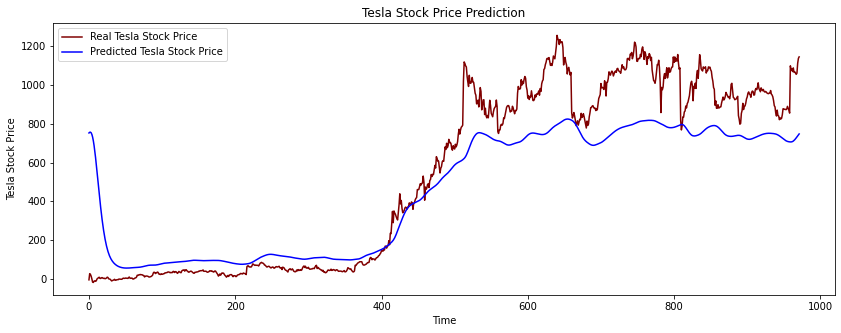

In [77]:
plt.figure(figsize=(14,5))
plt.plot(y__test, color = 'maroon', label = 'Real Tesla Stock Price')
plt.plot(y__pred, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()